In [1]:
import numpy as np
import pandas as pd
import networkx as nx

from matplotlib import pyplot as plt

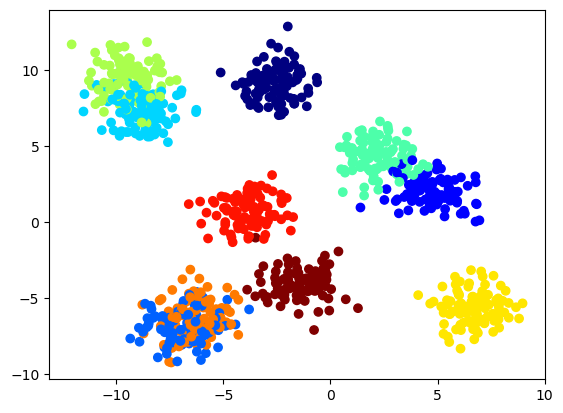

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=10, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="jet")


In [3]:
from pyballmapper import BallMapper

bm = BallMapper(X = X,
                eps = 3, 
                verbose=True)

Finding vertices...
17 vertices found.
Computing points_covered_by_landmarks...
Running BallMapper 
Finding edges...
Creating Ball Mapper graph...
Done


In [4]:
bm.add_coloring(coloring_df=pd.DataFrame(y, columns=['y']))

# here we adopt a standard colour palette
from matplotlib import colormaps as cm
my_palette = cm.get_cmap('jet')

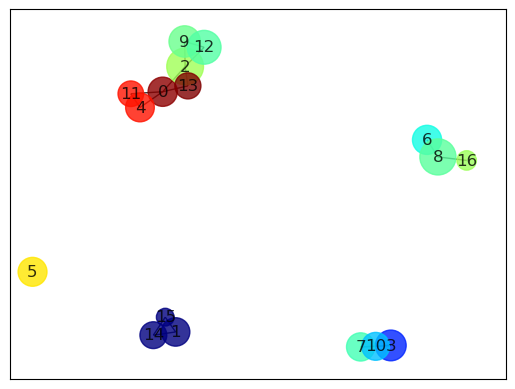

In [5]:
plt.figure()
# The BallMapper class has a builtin plotting method, buit around nx.draw_networkx
bm.draw_networkx(coloring_variable='y', color_palette=my_palette)
plt.show()

In [6]:
bm.Graph.edges(data=True)

EdgeDataView([(0, 2, {'size': 7}), (0, 4, {'size': 12}), (0, 11, {'size': 5}), (0, 13, {'size': 68}), (1, 14, {'size': 79}), (1, 15, {'size': 18}), (2, 9, {'size': 104}), (2, 12, {'size': 122}), (2, 13, {'size': 2}), (3, 7, {'size': 15}), (3, 10, {'size': 47}), (4, 11, {'size': 69}), (6, 8, {'size': 76}), (7, 10, {'size': 51}), (8, 16, {'size': 28}), (9, 12, {'size': 95}), (14, 15, {'size': 15})])

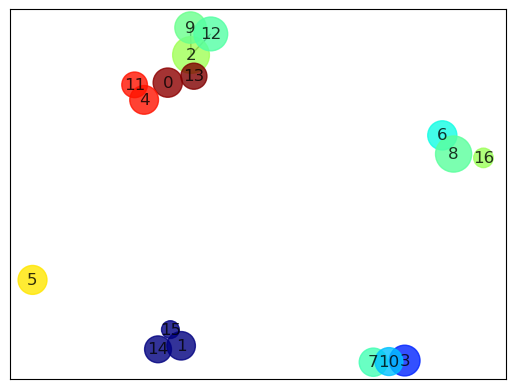

In [7]:
# we can filter the edges we want to plot, 
# for example lets plot only the edges with a certain size

# note that the node position is the same

edgelist = [e for e in bm.Graph.edges(data=True) if e[2]['size'] >= 100]

plt.figure()
bm.draw_networkx(coloring_variable='y', color_palette=my_palette, edgelist=edgelist)
plt.show()

## We can prune the edges also in the Bokeh interface

In [8]:
from pyballmapper.plotting import graph_GUI
from bokeh.plotting import show

In [11]:
## Full graph
my_fancy_gui = graph_GUI(bm.Graph, my_palette, 
                         tooltips_variables=['y'])
my_fancy_gui.color_by_variable('y')

show(my_fancy_gui.plot)

color by variable y 
MIN_VALUE: 0.000, MAX_VALUE: 9.000


In [12]:
## edges pruned
## note that the position of the nodes changes
my_fancy_gui = graph_GUI(bm.Graph, my_palette, 
                         edgelist=edgelist,
                         tooltips_variables=['y'])
my_fancy_gui.color_by_variable('y')

show(my_fancy_gui.plot)

color by variable y 
MIN_VALUE: 0.000, MAX_VALUE: 9.000
